# Class 3: Cleaning and tidying your data

&nbsp;  
It is very rare for a dataset to be error-free and formatted exactly as you would like. More often than not, you will need to spend some time cleaning and tidying your data to get it ready for analysis. Indeed, it has been estimated that people who work with data spend **80% of their time** finding, cleaning and organising their data, and only 20% of their time analysing it.

In last class, we learned some data cleaning that happens when first loading data into Python

In today's class, you'll practice a number of cleaning and tidying tasks, including adding and removing columns, rearranging columns, sorting and transforming the data, and removing duplicates.

## Load the modules

First, let's import pandas and numpy.

In [1]:
import pandas as pd
import numpy as np

## Adding and removing columns

&nbsp;  
<div>
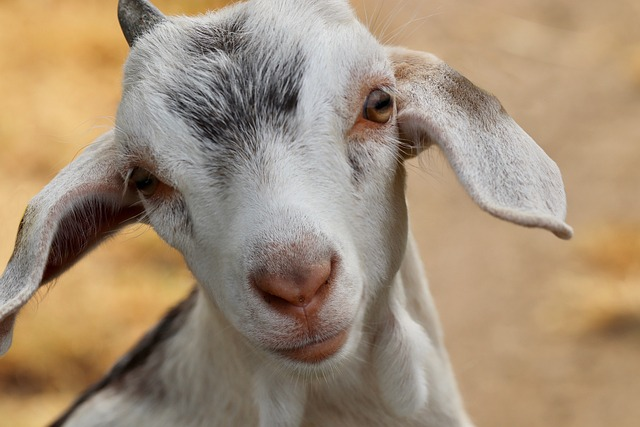
</div>
&nbsp;  

Let's start by reading in one of the datasets we used in the last class, count.csv, from the Datasets folder. Write code in the cell below to read this in and call it `df`.

In [2]:
df = pd.read_csv('../Datasets/count.csv')

As ever, inspect this to ensure that it loaded properly

In [3]:
df

,Field,Sheep,Goats,Barley,Oats
0,Waun_fach,45,44,103,521
1,Ffos_fawr,5,2,233,324
2,Aberheidol,67,23,432,734
3,Hen_cae,8,6,612,123
4,Glynan,23,7,332,243
5,Derwen,4,9,12,734
6,Llanwenant,55,3,4,128
7,Heol-y-bryn,1,11,543,223
8,Lan-y-mor,2,34,723,316
9,Pen-y-garn,67,3,126,402


Let's add two new columns: one of soil type and one of drainage. We can make the new columns from lists using `df['COLUMN_NAME'] = [LIST]`.

<div class="alert alert-block alert-info">
<b>Remember:</b> In Python, lists are enclosed in square brackets, with the values separated by commas.
</div>

In [4]:
df['Soil'] = ['Sand', 'Loam', 'Loam', 'Clay', 'Clay', 'Loam', 'Sand', 'Sand', 'Clay', 'Clay']
df['Drainage'] = ['Good', 'OK', 'Poor', 'Poor', 'Poor', 'Good', 'Good', 'OK', 'OK', 'Poor']

Let's have a look at our new dataset to check our new columns have been added correctly.

In [5]:
df

,Field,Sheep,Goats,Barley,Oats,Soil,Drainage
0,Waun_fach,45,44,103,521,Sand,Good
1,Ffos_fawr,5,2,233,324,Loam,OK
2,Aberheidol,67,23,432,734,Loam,Poor
3,Hen_cae,8,6,612,123,Clay,Poor
4,Glynan,23,7,332,243,Clay,Poor
5,Derwen,4,9,12,734,Loam,Good
6,Llanwenant,55,3,4,128,Sand,Good
7,Heol-y-bryn,1,11,543,223,Sand,OK
8,Lan-y-mor,2,34,723,316,Clay,OK
9,Pen-y-garn,67,3,126,402,Clay,Poor


Now let's remove a column. To drop a single column you can use the code `df = df.drop(columns = 'COLUMN_NAME')`. To drop multiple columns, you need to place the column names inside a list: `df = df.drop(columns = ['COLUMN_NAME1', 'COLUMN_NAME2'])`.

Write code in the cell below to drop the 'Goats' column.

In [6]:
df = df.drop(columns = 'Goats')

Now write code to drop both the 'Barley' and 'Oats' columns.

In [7]:
df = df.drop(columns = ['Barley', 'Oats'])

Lets have a look to see whether everything has worked.

In [8]:
df

,Field,Sheep,Soil,Drainage
0,Waun_fach,45,Sand,Good
1,Ffos_fawr,5,Loam,OK
2,Aberheidol,67,Loam,Poor
3,Hen_cae,8,Clay,Poor
4,Glynan,23,Clay,Poor
5,Derwen,4,Loam,Good
6,Llanwenant,55,Sand,Good
7,Heol-y-bryn,1,Sand,OK
8,Lan-y-mor,2,Clay,OK
9,Pen-y-garn,67,Clay,Poor


It is also possible to use the `df.drop()` function to remove **rows** rather than columns. To drop a row, you can use the code `df = df.drop(ROW_NUMBER)`. (Note: For this function, Python assumes anything inside the brackets relates to a row. That is why you need to include the code `columns = ...` when you want to drop a column).

Type code in the cell below to remove the 5th row, then check that is has worked. Remember that Python indexing starts at 0!

In [9]:
df = df.drop(4)
df

,Field,Sheep,Soil,Drainage
0,Waun_fach,45,Sand,Good
1,Ffos_fawr,5,Loam,OK
2,Aberheidol,67,Loam,Poor
3,Hen_cae,8,Clay,Poor
5,Derwen,4,Loam,Good
6,Llanwenant,55,Sand,Good
7,Heol-y-bryn,1,Sand,OK
8,Lan-y-mor,2,Clay,OK
9,Pen-y-garn,67,Clay,Poor


## Rearranging columns

Sometimes, you might want your columns (or rows) in a certain order. The easiest way to do this is to make a list of your column names, rearrange your list into the order you want, then apply this new order to the dataframe. Have a look through the code in the cells below and see if you can follow these steps.

In [10]:
cols = df.columns.tolist()
cols

['Field', 'Sheep', 'Soil', 'Drainage']

Reminders:

- if you have a Python list, you can extract single values using square brackets
- numbers in python start at zero!

See these examples:

In [11]:
cols[0]

'Field'

So, we can type out the order that we now want:

In [12]:
cols_new = [cols[1], cols[3], cols[2], cols[0]]
cols_new

['Sheep', 'Drainage', 'Soil', 'Field']

In [13]:
df[cols_new]

,Sheep,Drainage,Soil,Field
0,45,Good,Sand,Waun_fach
1,5,OK,Loam,Ffos_fawr
2,67,Poor,Loam,Aberheidol
3,8,Poor,Clay,Hen_cae
5,4,Good,Loam,Derwen
6,55,Good,Sand,Llanwenant
7,1,OK,Sand,Heol-y-bryn
8,2,OK,Clay,Lan-y-mor
9,67,Poor,Clay,Pen-y-garn


Let's have a go rearranging the columns into alphabetical order. In the last class, we used a function called `sort_values` for sorting. However, this function is for dataframes, whereas we need to sort a list. So let's use another function, called `sorted`, instead. By default, `sorted` sorts numbers in ascending order, and strings in alphabetical order.

In [14]:
cols = df.columns.tolist()
cols

['Field', 'Sheep', 'Soil', 'Drainage']

In [15]:
cols_sorted = sorted(cols)

In [16]:
df[cols_sorted]

,Drainage,Field,Sheep,Soil
0,Good,Waun_fach,45,Sand
1,OK,Ffos_fawr,5,Loam
2,Poor,Aberheidol,67,Loam
3,Poor,Hen_cae,8,Clay
5,Good,Derwen,4,Loam
6,Good,Llanwenant,55,Sand
7,OK,Heol-y-bryn,1,Sand
8,OK,Lan-y-mor,2,Clay
9,Poor,Pen-y-garn,67,Clay


In the cell below, have a go rearranging the dataset so that the columns are in reverse alphabetical order. You will need to edit the `sorted` function so that the order is reversed. Have a look at this Python cheat sheet if you need help: https://www.pythoncheatsheet.org/builtin/sorted.

In [17]:
cols = df.columns.tolist()
cols_reversed = sorted(cols, reverse = True)
df[cols_reversed]

,Soil,Sheep,Field,Drainage
0,Sand,45,Waun_fach,Good
1,Loam,5,Ffos_fawr,OK
2,Loam,67,Aberheidol,Poor
3,Clay,8,Hen_cae,Poor
5,Loam,4,Derwen,Good
6,Sand,55,Llanwenant,Good
7,Sand,1,Heol-y-bryn,OK
8,Clay,2,Lan-y-mor,OK
9,Clay,67,Pen-y-garn,Poor


## Sorting data

In last week's class, you were introduced to the `sort_values` function, which can be used to sort columns within a dataframe. To use this function, all you need to do is specify the column(s) and the direction: `df = df.sort_values(by = [col1, col2], ascending = False)`.

Remember how to ask for help! You can search on the pandas official help website.

First, reload the count.csv dataset since we have removed so many columns.

Let, call it df.

In [18]:
df = pd.read_csv('../Datasets/count.csv')

Now, sort the dataset by 'Sheep' in ascending order and check it has worked.

In [19]:
df = df.sort_values(by = 'Sheep')
df

,Field,Sheep,Goats,Barley,Oats
7,Heol-y-bryn,1,11,543,223
8,Lan-y-mor,2,34,723,316
5,Derwen,4,9,12,734
1,Ffos_fawr,5,2,233,324
3,Hen_cae,8,6,612,123
4,Glynan,23,7,332,243
0,Waun_fach,45,44,103,521
6,Llanwenant,55,3,4,128
2,Aberheidol,67,23,432,734
9,Pen-y-garn,67,3,126,402


Sort the dataset by 'Sheep' then 'Oats' in ascending order and check it has worked.

In [20]:
df = df.sort_values(by = ['Sheep', 'Oats'])
df

,Field,Sheep,Goats,Barley,Oats
7,Heol-y-bryn,1,11,543,223
8,Lan-y-mor,2,34,723,316
5,Derwen,4,9,12,734
1,Ffos_fawr,5,2,233,324
3,Hen_cae,8,6,612,123
4,Glynan,23,7,332,243
0,Waun_fach,45,44,103,521
6,Llanwenant,55,3,4,128
9,Pen-y-garn,67,3,126,402
2,Aberheidol,67,23,432,734


Sort by 'Barley' in descending order and check it has worked.

In [21]:
df = df.sort_values(by = 'Barley', ascending = False)
df

,Field,Sheep,Goats,Barley,Oats
8,Lan-y-mor,2,34,723,316
3,Hen_cae,8,6,612,123
7,Heol-y-bryn,1,11,543,223
2,Aberheidol,67,23,432,734
4,Glynan,23,7,332,243
1,Ffos_fawr,5,2,233,324
9,Pen-y-garn,67,3,126,402
0,Waun_fach,45,44,103,521
5,Derwen,4,9,12,734
6,Llanwenant,55,3,4,128


## Transforming data

It's also possible to make new columns by transforming existing columns.

Numerical columns can be treated like numbers. For example:

- `df['More_Sheep'] = df['Sheep'] * 50`
- `df['Per_Sheep'] = df['Barley'] / df['Sheep']`
- `df['Nonsense'] = df['Goats] * df['Oats']`

Numpy allows you to do even fancier operations:

- `df['Logged_Oats'] = np.log(df['Oats'])`
- `df[Sqrt_Barley'] = np.sqrt(df['Barley'])`

... etc

Make a column called 'Cereals' which is the sum of 'Barley' and 'Oats'. Check to see your code has worked correctly.

In [22]:
df['Cereals'] = df['Barley'] + df['Oats']
df

,Field,Sheep,Goats,Barley,Oats,Cereals
8,Lan-y-mor,2,34,723,316,1039
3,Hen_cae,8,6,612,123,735
7,Heol-y-bryn,1,11,543,223,766
2,Aberheidol,67,23,432,734,1166
4,Glynan,23,7,332,243,575
1,Ffos_fawr,5,2,233,324,557
9,Pen-y-garn,67,3,126,402,528
0,Waun_fach,45,44,103,521,624
5,Derwen,4,9,12,734,746
6,Llanwenant,55,3,4,128,132


Now make another column called 'Half_Cereals' by dividing this by 2.

In [23]:
df['Half_Cereals'] = df['Cereals'] / 2
df

,Field,Sheep,Goats,Barley,Oats,Cereals,Half_Cereals
8,Lan-y-mor,2,34,723,316,1039,519.5
3,Hen_cae,8,6,612,123,735,367.5
7,Heol-y-bryn,1,11,543,223,766,383.0
2,Aberheidol,67,23,432,734,1166,583.0
4,Glynan,23,7,332,243,575,287.5
1,Ffos_fawr,5,2,233,324,557,278.5
9,Pen-y-garn,67,3,126,402,528,264.0
0,Waun_fach,45,44,103,521,624,312.0
5,Derwen,4,9,12,734,746,373.0
6,Llanwenant,55,3,4,128,132,66.0


It is also possible to transform columns that are coded as strings. First, let's add back in our 'Drainage' and 'Soil' columns.

In [24]:
df['Soil'] = ['Sand', 'Loam', 'Loam', 'Clay', 'Clay', 'Loam', 'Sand', 'Sand', 'Clay', 'Clay']
df['Drainage'] = ['Good', 'OK', 'Poor', 'Poor', 'Poor', 'Good', 'Good', 'OK', 'OK', 'Poor']

Now, we can make a new column called 'Soil_Drainage' by concatenating these together and separating them with an underscore.

In [25]:
df['Soil_Drainage'] = df['Soil'] + '_' + df['Drainage']
df

,Field,Sheep,Goats,Barley,Oats,Cereals,Half_Cereals,Soil,Drainage,Soil_Drainage
8,Lan-y-mor,2,34,723,316,1039,519.5,Sand,Good,Sand_Good
3,Hen_cae,8,6,612,123,735,367.5,Loam,OK,Loam_OK
7,Heol-y-bryn,1,11,543,223,766,383.0,Loam,Poor,Loam_Poor
2,Aberheidol,67,23,432,734,1166,583.0,Clay,Poor,Clay_Poor
4,Glynan,23,7,332,243,575,287.5,Clay,Poor,Clay_Poor
1,Ffos_fawr,5,2,233,324,557,278.5,Loam,Good,Loam_Good
9,Pen-y-garn,67,3,126,402,528,264.0,Sand,Good,Sand_Good
0,Waun_fach,45,44,103,521,624,312.0,Sand,OK,Sand_OK
5,Derwen,4,9,12,734,746,373.0,Clay,OK,Clay_OK
6,Llanwenant,55,3,4,128,132,66.0,Clay,Poor,Clay_Poor


Try adding another column called 'Drainage_Oats' by concatenating 'Drainage' and 'Oats' together using the same method as the cell above. What happens?

In [26]:
df['Drainage_Oats'] = df['Drainage'] + df['Oats']

TypeError: can only concatenate str (not "int") to str

This code has failed because we have 'Oats' coded as an integer. We could recode 'Oats' as text in the dataframe using `df = df.astype({'Oats': string})` but that might make things difficult when we come to do our analysis. Instead, let's tell pandas to treat 'Oats' as text just for the concatenation.

In [27]:
# hint: use df['Oats'].astype(str)
# you can ask for help on .astype to find out what it does
df['Drainage_Oats'] = df['Drainage'] + '_' + df['Oats'].astype(str)
df

,Field,Sheep,Goats,Barley,Oats,Cereals,Half_Cereals,Soil,Drainage,Soil_Drainage,Drainage_Oats
8,Lan-y-mor,2,34,723,316,1039,519.5,Sand,Good,Sand_Good,Good_316
3,Hen_cae,8,6,612,123,735,367.5,Loam,OK,Loam_OK,OK_123
7,Heol-y-bryn,1,11,543,223,766,383.0,Loam,Poor,Loam_Poor,Poor_223
2,Aberheidol,67,23,432,734,1166,583.0,Clay,Poor,Clay_Poor,Poor_734
4,Glynan,23,7,332,243,575,287.5,Clay,Poor,Clay_Poor,Poor_243
1,Ffos_fawr,5,2,233,324,557,278.5,Loam,Good,Loam_Good,Good_324
9,Pen-y-garn,67,3,126,402,528,264.0,Sand,Good,Sand_Good,Good_402
0,Waun_fach,45,44,103,521,624,312.0,Sand,OK,Sand_OK,OK_521
5,Derwen,4,9,12,734,746,373.0,Clay,OK,Clay_OK,OK_734
6,Llanwenant,55,3,4,128,132,66.0,Clay,Poor,Clay_Poor,Poor_128


Before we move on, let's just explore how we might split a text column. This might be useful, for example, when we have a column of species names (e.g. *Macropus rufus*) and we want to create two new columns separating the genus (*Macropus*) and species (*rufus*). In this example, we'll split the 'Soil_Drainage' column on the underscore, then add them back in as two new columns.

In [28]:
# you can ask for help on .str.split, too
df[['Soil_new', 'Drainage_new']] = df['Soil_Drainage'].str.split('_', expand = True)
df

,Field,Sheep,Goats,Barley,Oats,Cereals,Half_Cereals,Soil,Drainage,Soil_Drainage,Drainage_Oats,Soil_new,Drainage_new
8,Lan-y-mor,2,34,723,316,1039,519.5,Sand,Good,Sand_Good,Good_316,Sand,Good
3,Hen_cae,8,6,612,123,735,367.5,Loam,OK,Loam_OK,OK_123,Loam,OK
7,Heol-y-bryn,1,11,543,223,766,383.0,Loam,Poor,Loam_Poor,Poor_223,Loam,Poor
2,Aberheidol,67,23,432,734,1166,583.0,Clay,Poor,Clay_Poor,Poor_734,Clay,Poor
4,Glynan,23,7,332,243,575,287.5,Clay,Poor,Clay_Poor,Poor_243,Clay,Poor
1,Ffos_fawr,5,2,233,324,557,278.5,Loam,Good,Loam_Good,Good_324,Loam,Good
9,Pen-y-garn,67,3,126,402,528,264.0,Sand,Good,Sand_Good,Good_402,Sand,Good
0,Waun_fach,45,44,103,521,624,312.0,Sand,OK,Sand_OK,OK_521,Sand,OK
5,Derwen,4,9,12,734,746,373.0,Clay,OK,Clay_OK,OK_734,Clay,OK
6,Llanwenant,55,3,4,128,132,66.0,Clay,Poor,Clay_Poor,Poor_128,Clay,Poor


## Removing duplicates

It is easy to remove duplicated rows using the `drop_duplicates` function. There aren't any duplicated rows in the count.csv dataset, so lets create a new dataset to illustrate how this works.

In [29]:
df_withdups = pd.DataFrame([[1, 6.5, 3], [1, 6.5, 3], [2, 4, 7.2], [0.9, 6.5, 3]])
df_withdups

,0,1,2
0,1.0,6.5,3.0
1,1.0,6.5,3.0
2,2.0,4.0,7.2
3,0.9,6.5,3.0


The first two rows are duplicated. We can drop the duplicated row using the following code...

In [30]:
df_withdups.drop_duplicates()

,0,1,2
0,1.0,6.5,3.0
2,2.0,4.0,7.2
3,0.9,6.5,3.0


And if we want to reset the index...

In [31]:
df_withdups.drop_duplicates().reset_index(drop = True)

,0,1,2
0,1.0,6.5,3.0
1,2.0,4.0,7.2
2,0.9,6.5,3.0


Here's another dataset with duplicated rows.

Have a go removing the duplicated rows from this dataset, and reset the index.

In [32]:
data_withdups2 = pd.DataFrame([[5.4, 1.3, 8.9, 2.0], [4.2, 6.6, 3.7, 1.9], [2.7, 3.0, 9.1, 9.3], 
                     [4.2, 6.6, 3.7, 1.9], [7.6, 4.4, 9.0, 4.3], [7.6, 4.4, 9.0, 4.3]])
data_withdups2

,0,1,2,3
0,5.4,1.3,8.9,2.0
1,4.2,6.6,3.7,1.9
2,2.7,3.0,9.1,9.3
3,4.2,6.6,3.7,1.9
4,7.6,4.4,9.0,4.3
5,7.6,4.4,9.0,4.3


In [33]:
data_withdups2.drop_duplicates().reset_index(drop = True)


,0,1,2,3
0,5.4,1.3,8.9,2.0
1,4.2,6.6,3.7,1.9
2,2.7,3.0,9.1,9.3
3,7.6,4.4,9.0,4.3


### Just because you can, doesn't mean that you should

The examples so far have focused on the mechanics of how you manipulate columns in Python data frames.

Some of these things are sensible, like, the total number of cereals as the sum of barley and oats.

Others are probably meaningless, like, Barley per Sheep.

In each data analysis that you face, try to avoid meaningless work and stick to meaningful.

Next, we'll move on to working with a large real dataset. You might be able to finish this in class, or otherwise need to finish this as homework.

## Cleaning up an ecology dataset

This dataset contains a record of the animal species observed during a long-term study of a desert ecosystem in Arizona (S. K. Morgan Ernest *et al*. 2009. Long-term monitoring and experimental manipulation of a Chihuahuan Desert ecosystem near Portal, Arizona, USA. Ecology 90:1708.).

Read in surveys.csv from the Datasets folder, and call it 'surveys'. 

&nbsp;  
<div>
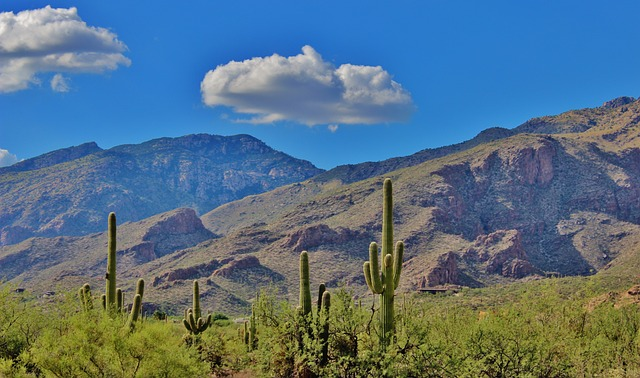
</div>
&nbsp;  

In [34]:
surveys = pd.read_csv('../Datasets/surveys.csv')

Use `surveys.head()` to check it has loaded correctly.

In [35]:
surveys.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


Drop the 'record_id' column.

In [36]:
surveys = surveys.drop(columns = 'record_id')

Rearrange the remaining columns so that 'species_id' is first. Use `surveys.head()` to check your code has worked.

In [37]:
cols = surveys.columns.tolist()
cols_new = [cols[4], cols[0], cols[1], cols[2], cols[3], cols[5], cols[6], cols[7]]
surveys = surveys[cols_new]
surveys.head()

,species_id,month,day,year,plot_id,sex,hindfoot_length,weight
0,NL,7,16,1977,2,M,32.0,NaN
1,NL,7,16,1977,3,M,33.0,NaN
2,DM,7,16,1977,2,F,37.0,NaN
3,DM,7,16,1977,7,M,36.0,NaN
4,DM,7,16,1977,3,M,35.0,NaN


Sort by 'plot_id' and then by 'species_id' in ascending order.

In [38]:
surveys = surveys.sort_values(by = ['plot_id', 'species_id'])

Add a new column called 'hindfoot_length_cm' which converts the 'hindfoot_length' column from mm to cm.

In [39]:
surveys['hindfoot_length_cm'] = surveys['hindfoot_length'] / 10

Add a new column called 'date' which concatenates the 'day', 'month' and 'year' columns into a day/month/year format.

*Tip: the `astype(str)` function will help.*

In [40]:
surveys['date'] = surveys['day'].astype(str) + '/' + surveys['month'].astype(str) + '/' + surveys['year'].astype(str)

And some revision from last class - remove any rows containing missing values.

In [41]:
surveys.dropna(inplace = True)

Now use `surveys.head()` again to check all your formatting has worked.

In [42]:
surveys.head()

,species_id,month,day,year,plot_id,sex,hindfoot_length,weight,hindfoot_length_cm,date
17373,BA,4,24,1990,1,M,14.0,7.0,1.4,24/4/1990
262,DM,10,16,1977,1,M,37.0,40.0,3.7,16/10/1977
269,DM,10,16,1977,1,F,36.0,38.0,3.6,16/10/1977
284,DM,10,16,1977,1,M,36.0,53.0,3.6,16/10/1977
351,DM,11,12,1977,1,M,36.0,40.0,3.6,12/11/1977


### Let's make a plot

It's a good idea to look at your data with visualisation as well. We'll do a lot more with plotting in week 3 onwards.

Let's use the pairplot, that we learned in Class 1, to understand how the variables are related to each other.

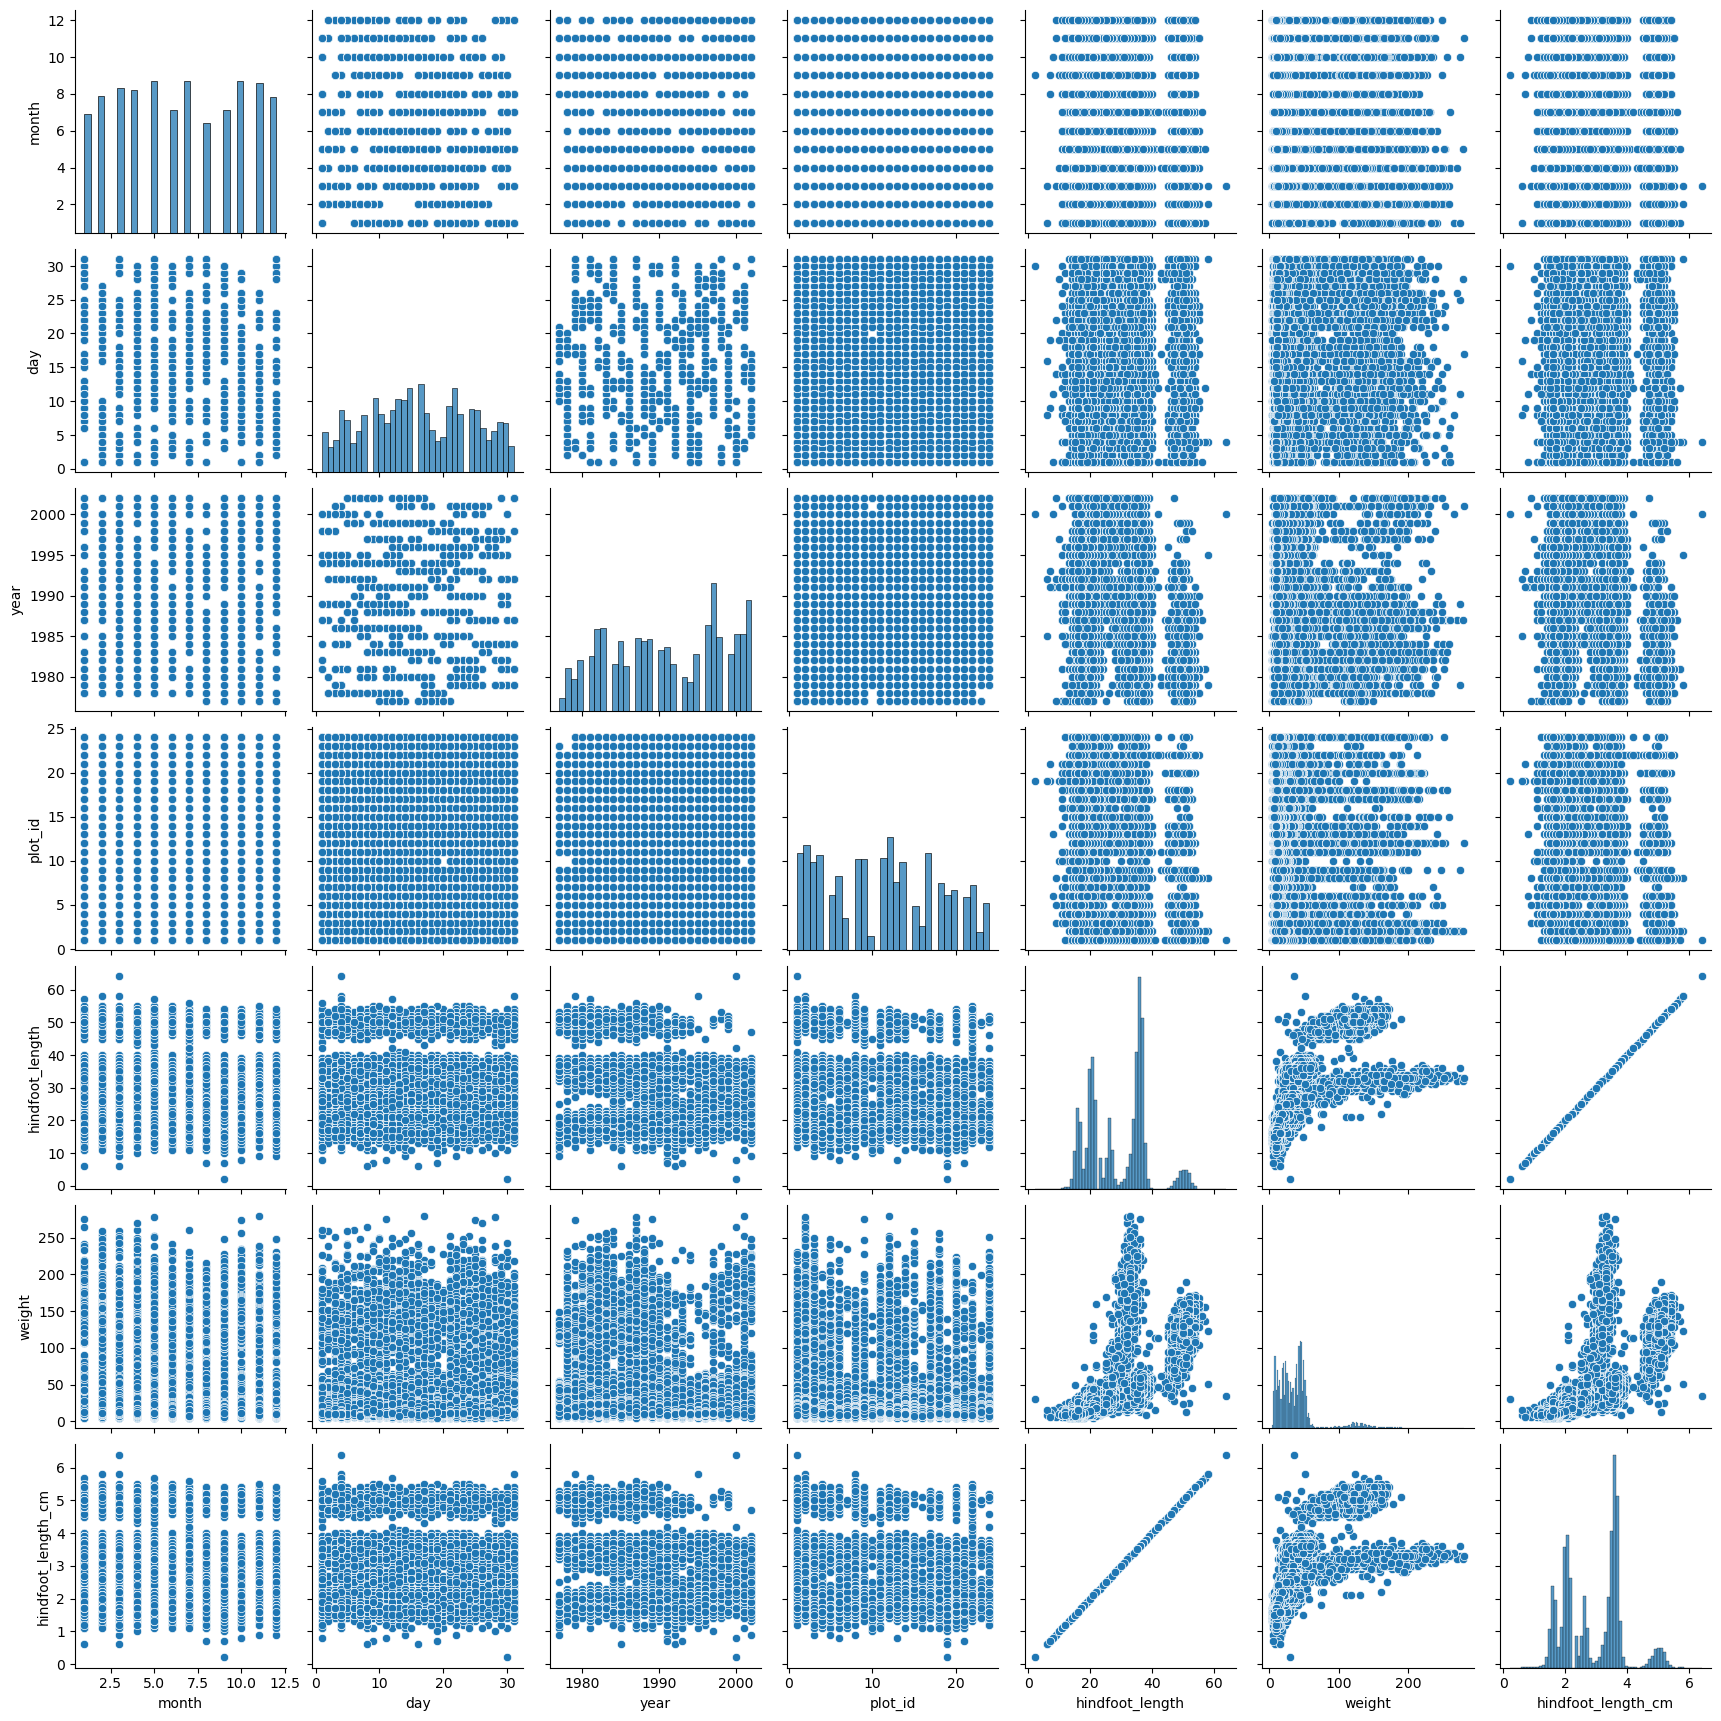

In [43]:
import seaborn as sns
sns.pairplot(surveys)

What does this plot tell you about the dataset?

## What to do next

Continue to practise some of these commands on your own datasets, or on others found in the Datasets folder, that we loaded into Python in Class 2.

Class 3 homework focuses on how to understand how Python commands are put together, and how to recover from Python disasters.

Class 4 will build directly on cleaning and tidying data by reshaping data, including in the homework that involves practise with different datasets.